In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [36]:
# Import the csv files
df1 = pd.read_csv('C:/Users/tonyt/phd_application/Mousa_2017-2021.csv')
df2 = pd.read_csv('C:/Users/tonyt/phd_application/Mousa.csv')

In [37]:
display(df1, df2)

,TAGNAME,TIME,SUNANGLE,VALUE
0,Main Optic,11/06/2018 12:14,53.068890,On
1,Main Optic,11/06/2018 12:26,52.911204,Off
2,Main Optic,11/06/2018 12:26,52.906652,On
3,Main Optic,11/06/2018 12:27,52.883761,Off
4,Main Optic,11/06/2018 21:48,-1.351854,On
...,...,...,...,...
2472,Main optic,06/10/2021 06:16,-0.836685,Off
2473,Main optic,06/10/2021 17:43,-2.206841,On
2474,Main optic,07/10/2021 06:48,2.350224,Off
2475,Main optic,07/10/2021 17:15,0.073636,On


,time,latitude,longitude,Temp 2m,Dewpoint 2m,Pressure,Precipitation,GHI,DHI,BNI
0,2017-01-01T00:00:00,59.998,-1.159,5.033806,1.672035,101334.064240,2.216046e-04,0.0,0.0,0.0
1,2017-01-01T01:00:00,59.998,-1.159,5.425615,0.864813,101388.493367,1.055407e-04,0.0,0.0,0.0
2,2017-01-01T02:00:00,59.998,-1.159,5.422438,-0.986960,101409.647045,6.948356e-05,0.0,0.0,0.0
3,2017-01-01T03:00:00,59.998,-1.159,5.638499,-1.776457,101441.377563,3.087299e-05,0.0,0.0,0.0
4,2017-01-01T04:00:00,59.998,-1.159,6.249945,-2.621832,101436.386245,7.737590e-07,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
43819,2019-12-31T19:00:00,59.998,-1.159,8.106405,4.447084,102296.907839,1.412830e-05,0.0,0.0,0.0
43820,2019-12-31T20:00:00,59.998,-1.159,8.174130,4.417643,102222.478218,7.503547e-06,0.0,0.0,0.0
43821,2019-12-31T21:00:00,59.998,-1.159,8.174130,4.692101,102185.263407,3.379976e-06,0.0,0.0,0.0
43822,2019-12-31T22:00:00,59.998,-1.159,8.186689,4.766358,102142.817122,2.839180e-06,0.0,0.0,0.0


### df1

In [38]:
# Drop 'tagname' column
df1 = df1.drop('TAGNAME', axis=1)

# Lowercase the headers
df1.columns = [headers.lower() for headers in df1.columns]

# Transform time into datetime
df1['time'] = pd.to_datetime(df1['time'], yearfirst=True)

df1.set_index('time', inplace=True, drop=True)

In [39]:
df1.head()

,sunangle,value
time,,
2018-11-06 12:14:00,53.068890,On
2018-11-06 12:26:00,52.911204,Off
2018-11-06 12:26:00,52.906652,On
2018-11-06 12:27:00,52.883761,Off
2018-11-06 21:48:00,-1.351854,On


In [40]:
df1['on/off'] = np.where(df1['value'] == 'On', 1, 0)

In [41]:
df1.head()

,sunangle,value,on/off
time,,,
2018-11-06 12:14:00,53.068890,On,1
2018-11-06 12:26:00,52.911204,Off,0
2018-11-06 12:26:00,52.906652,On,1
2018-11-06 12:27:00,52.883761,Off,0
2018-11-06 21:48:00,-1.351854,On,1


### df2

In [42]:
# Drop 'latitude' and 'longitude' columns
df2 = df2.drop(['latitude', 'longitude'], axis=1)

# Transform time into datetime
df2['time'] = pd.to_datetime(df2['time'], yearfirst=True)

df2.set_index('time', inplace=True, drop=True)

In [43]:
display(df2)

,Temp 2m,Dewpoint 2m,Pressure,Precipitation,GHI,DHI,BNI
time,,,,,,,
2017-01-01 00:00:00,5.033806,1.672035,101334.064240,2.216046e-04,0.0,0.0,0.0
2017-01-01 01:00:00,5.425615,0.864813,101388.493367,1.055407e-04,0.0,0.0,0.0
2017-01-01 02:00:00,5.422438,-0.986960,101409.647045,6.948356e-05,0.0,0.0,0.0
2017-01-01 03:00:00,5.638499,-1.776457,101441.377563,3.087299e-05,0.0,0.0,0.0
2017-01-01 04:00:00,6.249945,-2.621832,101436.386245,7.737590e-07,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-31 19:00:00,8.106405,4.447084,102296.907839,1.412830e-05,0.0,0.0,0.0
2019-12-31 20:00:00,8.174130,4.417643,102222.478218,7.503547e-06,0.0,0.0,0.0
2019-12-31 21:00:00,8.174130,4.692101,102185.263407,3.379976e-06,0.0,0.0,0.0


## Merging

In [44]:
merged_df = pd.concat([df1, df2], keys="time").sort_values(["time"]).ffill()

In [45]:
display(merged_df)

sunangle value  on/off   Temp 2m  Dewpoint 2m  \
  time                                                                 
i 2017-01-01 00:00:00       NaN   NaN     NaN  5.033806     1.672035   
  2017-01-01 01:00:00       NaN   NaN     NaN  5.425615     0.864813   
  2017-01-01 02:00:00       NaN   NaN     NaN  5.422438    -0.986960   
  2017-01-01 03:00:00       NaN   NaN     NaN  5.638499    -1.776457   
  2017-01-01 04:00:00       NaN   NaN     NaN  6.249945    -2.621832   
...                         ...   ...     ...       ...          ...   
  2021-12-31 19:00:00 -2.401889    On     1.0  7.444810     2.499739   
  2021-12-31 20:00:00 -2.401889    On     1.0  7.480538     2.408487   
  2021-12-31 21:00:00 -2.401889    On     1.0  7.484943     2.379407   
  2021-12-31 22:00:00 -2.401889    On     1.0  7.419359     3.081344   
  2021-12-31 23:00:00 -2.401889    On     1.0  7.355732     3.211035   

                            Pressure  Precipitation  GHI  DHI  BNI  
  time                                                              
i 2017-01-01 00:00:00  101334.064240   2.216046e-04  0.0  0.0  0.0  
  2017-01-01 01:00:00  101388.493367   1.055407e-04  0.0  0.0  0.0  
  2017-01-01 02:00:00  101409.647045   6.948356e-05  0.0  0.0  0.0  
  2017-01-01 03:00:00  101441.377563   3.087299e-05  0.0  0.0  0.0  
  2017-01-01 04:00:00  101436.386245   7.737590e-07  0.0  0.0  0.0  
...                              ...            ...  ...  ...  ...  
  2021-12-31 19:00:00  100789.553448  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 20:00:00  100881.064732  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 21:00:00  100902.201517  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 22:00:00  100985.526878  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 23:00:00  101072.273221  -4.336809e-19  0.0  0.0  0.0  

[46301 rows x 10 columns]

In [46]:
merged_df.interpolate(method ='linear')

sunangle value  on/off   Temp 2m  Dewpoint 2m  \
  time                                                                 
i 2017-01-01 00:00:00       NaN   NaN     NaN  5.033806     1.672035   
  2017-01-01 01:00:00       NaN   NaN     NaN  5.425615     0.864813   
  2017-01-01 02:00:00       NaN   NaN     NaN  5.422438    -0.986960   
  2017-01-01 03:00:00       NaN   NaN     NaN  5.638499    -1.776457   
  2017-01-01 04:00:00       NaN   NaN     NaN  6.249945    -2.621832   
...                         ...   ...     ...       ...          ...   
  2021-12-31 19:00:00 -2.401889    On     1.0  7.444810     2.499739   
  2021-12-31 20:00:00 -2.401889    On     1.0  7.480538     2.408487   
  2021-12-31 21:00:00 -2.401889    On     1.0  7.484943     2.379407   
  2021-12-31 22:00:00 -2.401889    On     1.0  7.419359     3.081344   
  2021-12-31 23:00:00 -2.401889    On     1.0  7.355732     3.211035   

                            Pressure  Precipitation  GHI  DHI  BNI  
  time                                                              
i 2017-01-01 00:00:00  101334.064240   2.216046e-04  0.0  0.0  0.0  
  2017-01-01 01:00:00  101388.493367   1.055407e-04  0.0  0.0  0.0  
  2017-01-01 02:00:00  101409.647045   6.948356e-05  0.0  0.0  0.0  
  2017-01-01 03:00:00  101441.377563   3.087299e-05  0.0  0.0  0.0  
  2017-01-01 04:00:00  101436.386245   7.737590e-07  0.0  0.0  0.0  
...                              ...            ...  ...  ...  ...  
  2021-12-31 19:00:00  100789.553448  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 20:00:00  100881.064732  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 21:00:00  100902.201517  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 22:00:00  100985.526878  -4.336809e-19  0.0  0.0  0.0  
  2021-12-31 23:00:00  101072.273221  -4.336809e-19  0.0  0.0  0.0  

[46301 rows x 10 columns]

In [47]:
merged_df.dropna(axis=0, inplace=True)

In [48]:
merged_df.head(50)

sunangle value  on/off   Temp 2m  Dewpoint 2m  \
  time                                                                 
t 2018-01-07 02:18:00 -1.639139   Off     0.0  4.591816    -2.737420   
i 2018-01-07 03:00:00 -1.639139   Off     0.0  5.255216    -1.878430   
  2018-01-07 04:00:00 -1.639139   Off     0.0  5.890624    -1.434587   
  2018-01-07 05:00:00 -1.639139   Off     0.0  6.053164    -0.198713   
  2018-01-07 06:00:00 -1.639139   Off     0.0  6.082662     0.622396   
  2018-01-07 07:00:00 -1.639139   Off     0.0  6.202760     1.565181   
  2018-01-07 08:00:00 -1.639139   Off     0.0  6.303294     2.816742   
  2018-01-07 09:00:00 -1.639139   Off     0.0  6.507672     3.167990   
  2018-01-07 10:00:00 -1.639139   Off     0.0  7.094920     4.069834   
  2018-01-07 11:00:00 -1.639139   Off     0.0  7.177695     4.136410   
  2018-01-07 12:00:00 -1.639139   Off     0.0  7.267091     4.199926   
  2018-01-07 13:00:00 -1.639139   Off     0.0  7.285452     4.200691   
  2018-01-07 14:00:00 -1.639139   Off     0.0  7.323980     4.118044   
  2018-01-07 15:00:00 -1.639139   Off     0.0  7.296589     4.043433   
  2018-01-07 16:00:00 -1.639139   Off     0.0  7.146692     3.920611   
  2018-01-07 17:00:00 -1.639139   Off     0.0  6.945625     3.629434   
  2018-01-07 18:00:00 -1.639139   Off     0.0  6.722886     3.209696   
  2018-01-07 19:00:00 -1.639139   Off     0.0  6.460415     2.927703   
  2018-01-07 20:00:00 -1.639139   Off     0.0  6.183797     2.609743   
  2018-01-07 21:00:00 -1.639139   Off     0.0  5.962563     1.696803   
t 2018-01-07 21:50:00 -1.303401    On     1.0  5.962563     1.696803   
i 2018-01-07 22:00:00 -1.303401    On     1.0  5.924336     2.458224   
  2018-01-07 23:00:00 -1.303401    On     1.0  5.758185     1.935178   
  2018-01-08 00:00:00 -1.303401    On     1.0  5.623940     0.874163   
  2018-01-08 01:00:00 -1.303401    On     1.0  5.679323     0.242451   
  2018-01-08 02:00:00 -1.303401    On     1.0  5.793402     0.076393   
  2018-01-08 03:00:00 -1.303401    On     1.0  5.942998    -0.173460   
  2018-01-08 04:00:00 -1.303401    On     1.0  6.144968    -0.341432   
t 2018-01-08 04:01:00  1.145420   Off     0.0  6.144968    -0.341432   
i 2018-01-08 05:00:00  1.145420   Off     0.0  6.280117    -0.079718   
  2018-01-08 06:00:00  1.145420   Off     0.0  6.345734     0.295636   
  2018-01-08 07:00:00  1.145420   Off     0.0  6.356269     0.729531   
  2018-01-08 08:00:00  1.145420   Off     0.0  6.380650     1.292753   
  2018-01-08 09:00:00  1.145420   Off     0.0  6.427004     1.712491   
  2018-01-08 10:00:00  1.145420   Off     0.0  6.468542     1.587373   
  2018-01-08 11:00:00  1.145420   Off     0.0  6.474562     1.411366   
  2018-01-08 12:00:00  1.145420   Off     0.0  6.458308     1.466081   
  2018-01-08 13:00:00  1.145420   Off     0.0  6.406235     1.645149   
  2018-01-08 14:00:00  1.145420   Off     0.0  6.389680     1.950482   
  2018-01-08 15:00:00  1.145420   Off     0.0  6.380650     2.059913   
  2018-01-08 16:00:00  1.145420   Off     0.0  6.363794     2.051878   
  2018-01-08 17:00:00  1.145420   Off     0.0  6.341520     2.046138   
  2018-01-08 18:00:00  1.145420   Off     0.0  6.294565     2.094349   
  2018-01-08 19:00:00  1.145420   Off     0.0  6.231054     1.951630   
  2018-01-08 20:00:00  1.145420   Off     0.0  6.110955     1.794755   
t 2018-01-08 20:40:00 -0.594896    On     1.0  6.110955     1.794755   
i 2018-01-08 21:00:00 -0.594896    On     1.0  6.070321     1.764527   
  2018-01-08 22:00:00 -0.594896    On     1.0  6.217208     1.663132   
  2018-01-08 23:00:00 -0.594896    On     1.0  6.254532     1.734683   
  2018-01-09 00:00:00 -0.594896    On     1.0  6.324062     1.693360   

                            Pressure  Precipitation      GHI      DHI  \
  time                                                                  
t 2018-01-07 02:18:00  102444.567751       0.000009   0.0000   0.0000   
i 2018-01-07 03:00:00  102408.606926       0.000048   0.000

# Setting up features and target variable

In [49]:
feature_cols = ['sunangle', 'Temp 2m', 'Dewpoint 2m', 'Pressure','Precipitation','GHI','DHI', 'BNI']
X = merged_df[feature_cols] # Features
y = merged_df['on/off'] # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 1 - Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [58]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2458, 1797],
       [ 607, 4487]], dtype=int64)

In [20]:
import seaborn as sns

Text(0.5, 257.44, 'Predicted value')

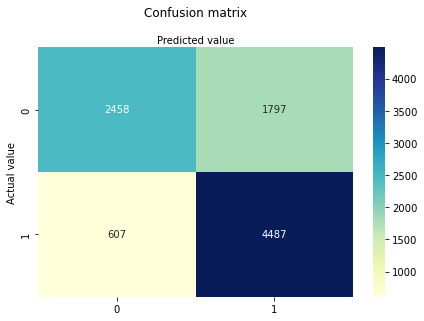

In [21]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual value')
plt.xlabel('Predicted value')

In [54]:
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.799871644026099
score on train: 0.8033874130861116


## 2 - Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB
mnb = GaussianNB().fit(X_train, y_train)
print("score on test: " + str(mnb.score(X_test, y_test)))
print("score on train: "+ str(mnb.score(X_train, y_train)))

score on test: 0.700181837629693
score on train: 0.7057942592262435


## 3 - Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print("score on test: "  + str(clf.score(X_test, y_test)))
print("score on train: " + str(clf.score(X_train, y_train)))

score on test: 0.9143223874211146
score on train: 1.0
